# Capstone 3

## 1. Libraries

In [1]:
# import standard libraries
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read Files

In [2]:
df_name_list = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers']
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

## 3. Data Wrangling

### 3.1 Data Exploration

In [3]:
all_dfs_dict = {'sellers':sellers, 'orders':orders, 'order_items':order_items, 'customers': customers, 'geolocation':geolocation, 'order_payments':order_payments, 'order_reviews':order_reviews, 'products':products}

In [4]:
def create_null_dict(dictionary):
    null_list = []
    for name, df in dictionary.items():
        n_rows = df.shape[0]
        n_cols = df.shape[1]
        null_sum = df.isnull().sum().sum()
        # get list of column names with null values
        null_columns = df.columns[df.isnull().any()].tolist()
        # get number of columns with null values 
        n_null_columns = len(null_columns)
        # if no null columns, return an empty string (no brackets)
        null_columns_str = ', '.join(null_columns) if null_columns else ""
        null_list.append({"dataframe":name,
                         "n_rows":n_rows,
                         "n_cols": n_cols,
                         "null_sum":null_sum,
                         "n_null_columns":n_null_columns,
                         "null_columns_names":null_columns_str})
    return pd.DataFrame(null_list)

null_dict = create_null_dict(all_dfs_dict)
null_dict

,dataframe,n_rows,n_cols,null_sum,n_null_columns,null_columns_names
0,sellers,3095,4,0,0,
1,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_dat..."
2,order_items,112650,7,0,0,
3,customers,99441,5,0,0,
4,geolocation,1000163,5,0,0,
5,order_payments,103886,5,0,0,
6,order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
7,products,32951,9,2448,8,"product_category_name, product_name_lenght, pr..."


#### 3.1.1 Observations of Null Information Table

* There are significantly more geolocations than customers
* There are likely multiple products per seller
* Most orders have reviews, but many are missing review titles and messages
* Some orders likely contain multiple products
* Some orders are missing order details
* Some products are missing information about them

In [5]:
summary_list = []
def summarize_dataframes(dictionary):
    summary_list = []
    for name, df in dictionary.items():
        total_rows = len(df)
        for col in df.columns:
            null_count = df[col].isnull().sum()
            dtype = df[col].dtype
            summary_list.append({
                "dataframe": name,
                "column": col,
                "dtype": dtype,
                "num_nulls": null_count,
                "percent_null":round(null_count / total_rows * 100, 2)})
    return pd.DataFrame(summary_list)

summary = summarize_dataframes(all_dfs_dict)
summary

,dataframe,column,dtype,num_nulls,percent_null
0,sellers,seller_id,object,0,0.00
1,sellers,seller_zip_code_prefix,int64,0,0.00
2,sellers,seller_city,object,0,0.00
3,sellers,seller_state,object,0,0.00
4,orders,order_id,object,0,0.00
5,orders,customer_id,object,0,0.00
6,orders,order_status,object,0,0.00
7,orders,order_purchase_timestamp,object,0,0.00
8,orders,order_approved_at,object,160,0.16
9,orders,order_delivered_carrier_date,object,1783,1.79


#### 3.1.2 Observations of General Information Table

* The geographic location data set is large likely due to the coordinate points and zip codes as there can be multiple of each per city and state.
* Most products have several descriptive factors
* Only around 12% of reviews have a title.
* Approximately 40% of reviews have a message.
* Category names, review titles, and review comments are in Portuguese. However, there is a translating data set for the category names.
* Several d-types need to be changed to dates or time format.
* There are unique identifiers for all datasets. This assumes there are no repeating combinations of the geographic location information. 

### 3.2 Data Cleaning

#### 3.2.1 Extract Information from Timestamps

In [6]:
def expand_timestamps(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df[f"{col}_weekday"] = df[col].dt.day_name()
        df[f"{col}_hour"] = df[col].dt.hour
        df[f"{col}_minute"] = df[col].dt.minute
        df[f"{col}_week"] = df[col].dt.isocalendar().week
        df[f"{col}_quarter"] = df[col].dt.quarter
        df[f"{col}_is_weekend"] = df[col].dt.dayofweek >= 5  # Saturday/Sunday = True
    return df

In [7]:
cols_orders = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders = expand_timestamps(orders, cols_orders)

In [8]:
order_items = expand_timestamps(order_items, ["shipping_limit_date"])

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   order_id                                  99441 non-null  object        
 1   customer_id                               99441 non-null  object        
 2   order_status                              99441 non-null  object        
 3   order_purchase_timestamp                  99441 non-null  datetime64[ns]
 4   order_approved_at                         99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date              97658 non-null  datetime64[ns]
 6   order_delivered_customer_date             96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date             99441 non-null  datetime64[ns]
 8   order_purchase_timestamp_year             99441 non-null  int32         
 9   order_purchase_timestamp_mon

In [10]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   order_id                        112650 non-null  object        
 1   order_item_id                   112650 non-null  int64         
 2   product_id                      112650 non-null  object        
 3   seller_id                       112650 non-null  object        
 4   shipping_limit_date             112650 non-null  datetime64[ns]
 5   price                           112650 non-null  float64       
 6   freight_value                   112650 non-null  float64       
 7   shipping_limit_date_year        112650 non-null  int32         
 8   shipping_limit_date_month       112650 non-null  int32         
 9   shipping_limit_date_day         112650 non-null  int32         
 10  shipping_limit_date_weekday     112650 non-null  object 

#### 3.2.2 Translating Product Category Names

In [11]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
products = pd.merge(products, product_category_name_translation, how = 'left', on = 'product_category_name')

In [14]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### 3.2.3 Handling Missing Values

In [15]:
timestamp_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# Filter rows with null in any timestamp column
null_rows = orders[orders[timestamp_cols].isnull().any(axis=1)]

# inspect their order statuses
null_rows["order_status"].value_counts()


order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64

In [16]:
missing_order_summary = orders.groupby("order_status")[timestamp_cols].apply(lambda x: x.isnull().sum())

In [17]:
missing_order_summary

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
order_status,,,
approved,0,2,2
canceled,141,550,619
created,5,5,5
delivered,14,2,8
invoiced,0,314,314
processing,0,301,301
shipped,0,0,1107
unavailable,0,609,609


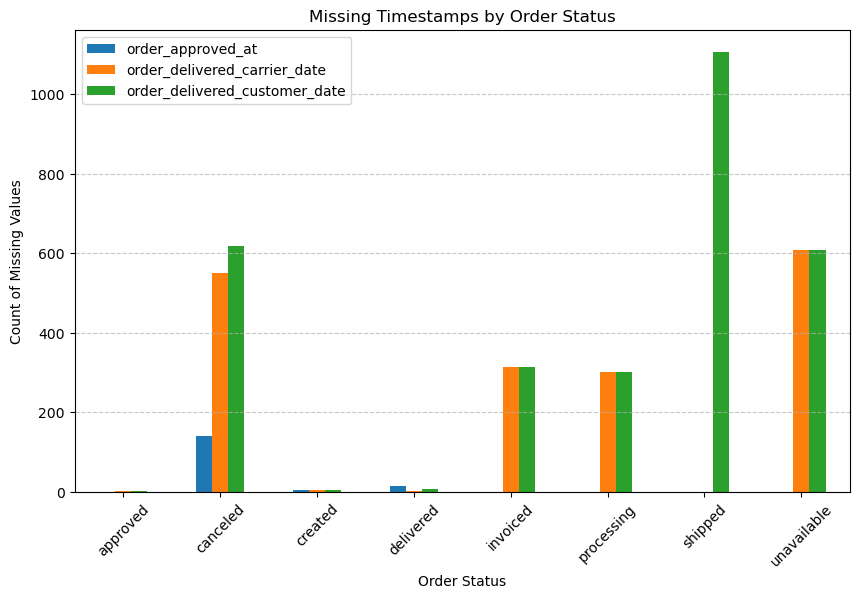

In [18]:
missing_order_summary.plot(kind="bar", figsize=(10,6))
plt.title("Missing Timestamps by Order Status")
plt.xlabel("Order Status")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
# Filter for "shipped" orders
mask = (
    (orders["order_status"] == "shipped") &
    (orders["order_delivered_carrier_date"].notnull()) &
    (orders["order_delivered_customer_date"].isnull())
)

shipped_in_transit = orders[mask]

In [20]:
shipped_in_transit[["order_id", "order_delivered_carrier_date", "order_delivered_customer_date", "order_status"]].head(10)


,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_status
44,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-05 14:32:00,NaT,shipped
154,6942b8da583c2f9957e990d028607019,2018-01-11 19:39:23,NaT,shipped
162,36530871a5e80138db53bcfd8a104d90,2017-05-11 13:21:47,NaT,shipped
231,4d630f57194f5aba1a3d12ce23e71cd9,2017-11-22 17:28:34,NaT,shipped
299,3b4ad687e7e5190db827e1ae5a8989dd,2018-07-04 15:20:00,NaT,shipped
305,b68d69564a79dea4776afa33d1d2fcab,2018-03-05 16:10:13,NaT,shipped
333,f373335aac9a659de916f7170b8bc07a,2018-03-20 21:08:28,NaT,shipped
374,5869074071e0f56e9085dc3742c97b2a,2018-06-12 14:09:00,NaT,shipped
430,6147a4d49752afd35a119d794e481588,2017-05-02 15:29:33,NaT,shipped
444,95e42e6aaf6264cd3e77c06b32dc3003,2017-11-24 19:07:43,NaT,shipped


In [21]:
len(shipped_in_transit)

1107

**Observations of Missing Delivery Timestamps**

An analysis of the delivery timestamp fields in the orders dataset revealed several missing values across different order statuses.

Orders with statuses such as “canceled,” “unavailable,” and “created” lack delivery timestamps because these orders did not complete the fulfillment process. This pattern is expected and does not indicate a data quality issue.

However, some orders labeled as “shipped” were also found to have missing delivery timestamps. Upon closer examination, all of these “shipped” orders contained delivery dates for the carrier, but not the customer. This indicates that the missing customer delivery timestamps represent orders currently in transit.

In [22]:
def label_delivery_stage(row):
    if row["order_status"] == "delivered":
        return "Delivered"
    elif row["order_status"] == "shipped":
        return "In transit"
    elif row["order_status"] in ["invoiced", "processing", "approved"]:
        return "Carrier Awaiting shipment"
    elif row["order_status"] == "canceled":
        return "Canceled"
    elif row["order_status"] == "unavailable":
        return "Unavailable"
    else:
        return "Other"

orders["delivery_stage"] = orders.apply(label_delivery_stage, axis=1)

In [23]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year,order_purchase_timestamp_month,...,order_estimated_delivery_date_year,order_estimated_delivery_date_month,order_estimated_delivery_date_day,order_estimated_delivery_date_weekday,order_estimated_delivery_date_hour,order_estimated_delivery_date_minute,order_estimated_delivery_date_week,order_estimated_delivery_date_quarter,order_estimated_delivery_date_is_weekend,delivery_stage
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,2017,10,18,Wednesday,0,0,42,4,False,Delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,2018,8,13,Monday,0,0,33,3,False,Delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,2018,9,4,Tuesday,0,0,36,3,False,Delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,...,2017,12,15,Friday,0,0,50,4,False,Delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,...,2018,2,26,Monday,0,0,9,1,False,Delivered


In [24]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [25]:
products.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [26]:
# Handle product info nulls
products['product_category_name'] = products['product_category_name'].fillna('unknown_category')
products['product_category_name_english'] = products['product_category_name_english'].fillna('unknown_category')

# Fill other null info columns
desc_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in desc_cols:
    products[col] = products[col].fillna(products[col].median())

# Fill physical attributes
phys_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in phys_cols:
    products[col] = products[col].fillna(products[col].median())

# Sanity check
products.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [27]:
# fix typos
products = products.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})

In [28]:
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### 3.2.4 Outliers

In [29]:
def detect_outliers_iqr(df):
        # Returns a summary of outlier counts for each numeric column
        outlier_summary = {}
        for col in df.select_dtypes(include=['number']).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
            outlier_summary[col] = outliers
        return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])

In [30]:
outlier_reports = {}

for name, data in all_dfs_dict.items():
    report = detect_outliers_iqr(data)
    outlier_reports[name] = report
    
combined_outliers = pd.concat(outlier_reports, axis=0)
combined_outliers.index.names = ['Dataset', 'Column']
combined_outliers.reset_index(inplace=True)

display(combined_outliers.head(26))

,Dataset,Column,Outlier_Count
0,sellers,seller_zip_code_prefix,0
1,order_items,order_item_id,13984
2,order_items,price,8427
3,order_items,freight_value,12134
4,customers,customer_zip_code_prefix,0
5,geolocation,geolocation_zip_code_prefix,0
6,geolocation,geolocation_lat,168240
7,geolocation,geolocation_lng,42348
8,order_payments,payment_sequential,4526
9,order_payments,payment_installments,6313


**Geolocation Dataset Outliers**

In [31]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


The outliers in the geolocation dataset could indicate coordinates outside of Brazil.  

In [32]:
geo_clean = geolocation[
    (geolocation['geolocation_lat'].between(-33.45, 5.17)) &
    (geolocation['geolocation_lng'].between(-73.60, -34.48))
].copy()

Brazil's national territory spans from approximately 5°16′20″ N latitude to 33°44′32″ S latitude and from 34°47′30″ W longitude to 73°59′32″ W longitude. 


To ensure valid geographic data, I filtered latitude and longitude values to Brazil’s national territory. This step removes invalid coordinates and ensures accurate mapping and distance analysis.

In [33]:
# sanity check to see if filtered latitude and longitudes fell within range
geo_clean[['geolocation_lat', 'geolocation_lng']].describe()

,geolocation_lat,geolocation_lng
count,999870.000000,999870.000000
mean,-21.174678,-46.389661
std,5.705058,4.259882
min,-33.449317,-72.930746
25%,-23.603334,-48.570639
50%,-22.919256,-46.637774
75%,-19.979436,-43.766871
max,4.482242,-34.793685


In [34]:
geo_clean.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Order Items Dataset Outliers**

In [35]:
order_items.describe()

,order_item_id,shipping_limit_date,price,freight_value,shipping_limit_date_year,shipping_limit_date_month,shipping_limit_date_day,shipping_limit_date_hour,shipping_limit_date_minute,shipping_limit_date_week,shipping_limit_date_quarter
count,112650.000000,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650.0,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320,2017.551735,6.115828,16.016343,12.624527,30.258313,24.875277,2.371221
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000,2017.000000,3.000000,9.000000,8.000000,15.000000,13.0,1.000000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000,2018.000000,6.000000,16.000000,13.000000,30.000000,24.0,2.000000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000,2018.000000,8.000000,23.000000,18.000000,46.000000,34.0,3.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,2020.000000,12.000000,31.000000,23.000000,59.000000,52.0,4.000000
std,0.705124,NaN,183.633928,15.806405,0.504091,3.219723,8.648936,6.648102,16.525976,14.004059,1.055156


In [36]:
order_items['freight_status'] = np.where(order_items['freight_value'] == 0, 'free_shipping', 'paid_shipping')


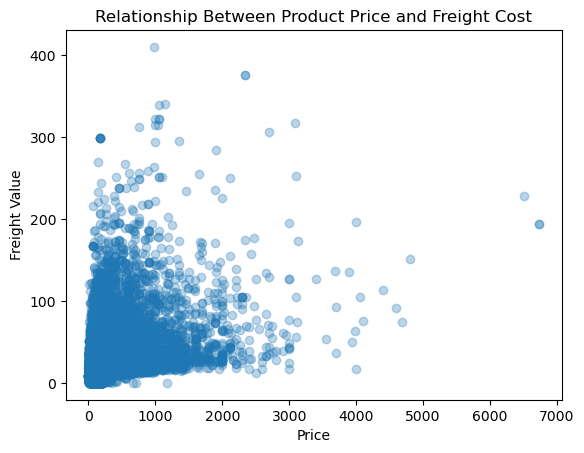

In [37]:
plt.scatter(order_items['price'], order_items['freight_value'], alpha=0.3)
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.title('Relationship Between Product Price and Freight Cost')
plt.show()

Outlier detection using the IQR method identified approximately 7.5% of price values and 10.8% of freight_value entries as statistical outliers in the order_items dataset. These outliers likely represent legitimate high-value or long-distance transactions rather than data errors. Therefore, instead of removal, they will be retained for descriptive analysis but may be capped or transformed in future modeling steps to reduce skewness.

**Order Reviews Dataset Summary**

In [38]:
order_reviews['review_score'].describe()
order_reviews['review_score'].value_counts().sort_index()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

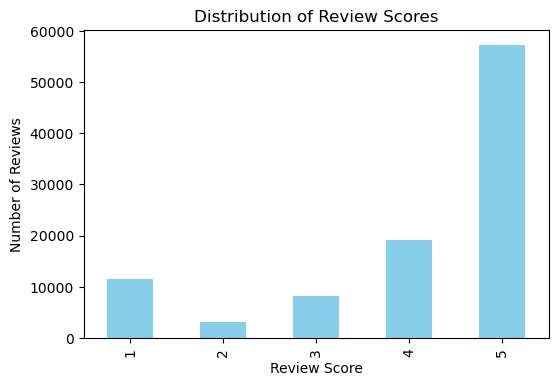

In [39]:
import matplotlib.pyplot as plt

order_reviews['review_score'].value_counts().sort_index().plot(
    kind='bar', color='skyblue', figsize=(6,4)
)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

The IQR method initially flagged outliers in the review_score column. However, upon further inspection, all values fell within the valid range of 1 to 5. This indicates that the identified “outliers” were statistical artifacts rather than erroneous data points. Therefore, no corrective action was necessary.

**Order Payments Dataset Outliers**

In [40]:
order_payments[['payment_installments', 'payment_value']].describe()

,payment_installments,payment_value
count,103886.000000,103886.000000
mean,2.853349,154.100380
std,2.687051,217.494064
min,0.000000,0.000000
25%,1.000000,56.790000
50%,1.000000,100.000000
75%,4.000000,171.837500
max,24.000000,13664.080000


In [41]:
zero_payments = order_payments[order_payments['payment_value'] == 0]
len(zero_payments)

9

In [42]:
zero_payments['payment_type'].value_counts()

payment_type
voucher        6
not_defined    3
Name: count, dtype: int64

In [43]:
undefined_orders = order_payments.loc[
    order_payments['payment_type'] == 'not_defined', 'order_id'
]

orders[orders['order_id'].isin(undefined_orders)][['order_id', 'order_status']]

,order_id,order_status
1130,00b1cb0320190ca0daa2c88b35206009,canceled
39919,4637ca194b6387e2d538dc89b124b0ee,canceled
40235,c8c528189310eaa44a745b8d9d26908b,canceled


In [44]:
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [45]:
order_payments.loc[
    (order_payments['payment_type'] == 'not_defined') & 
    (order_payments['payment_value'] == 0),
    'payment_type'
] = 'canceled_zero_payment'

In [46]:
# sanity check
order_payments['payment_type'].value_counts()

payment_type
credit_card              76795
boleto                   19784
voucher                   5775
debit_card                1529
canceled_zero_payment        3
Name: count, dtype: int64

Nine transactions were identified with a payment value of zero. Of these, six were labeled as voucher payments, which represent legitimate full-discount transactions. The remaining three were labeled "not_defined." Further investigation confirmed that these three "not_defined" payments belonged to canceled transactions.

In [47]:
zero_installments = order_payments[order_payments['payment_installments'] == 0]
len(zero_installments)

2

In [48]:
zero_installments['payment_type'].value_counts()

payment_type
credit_card    2
Name: count, dtype: int64

In [49]:
zero_installments_summary = zero_installments.merge(
    orders[['order_id', 'order_status']], on='order_id', how='left'
)
zero_installments_summary[['payment_type', 'payment_value', 'order_status']].value_counts()

payment_type  payment_value  order_status
credit_card   58.69          delivered       1
              129.94         delivered       1
Name: count, dtype: int64

In [50]:
order_payments.loc[
    (order_payments['payment_installments'] == 0) &
    (order_payments['payment_type'] == 'credit_card') &
    (order_payments['payment_value'] > 0),
    'payment_installments'
] = 1

Two records had payment_installments = 0 despite having valid payment values and being marked as delivered. These cases corresponded to credit card payments, which should always have at least one installment. Therefore, the installment count for these records was corrected from 0 to 1.

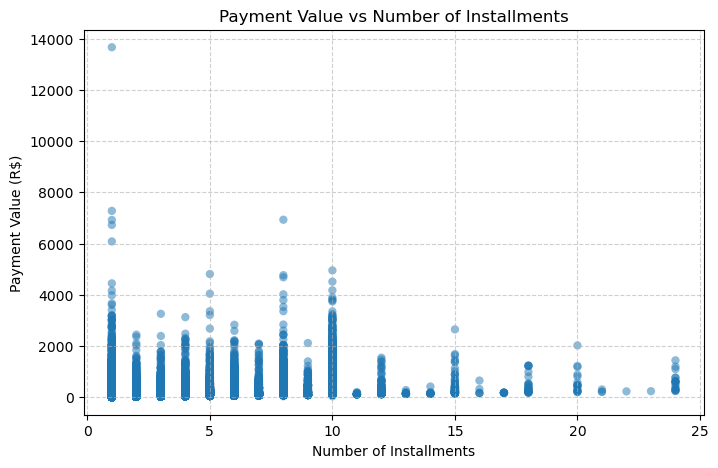

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(
    order_payments['payment_installments'],
    order_payments['payment_value'],
    alpha=0.5,
    edgecolors='none'
)
plt.title('Payment Value vs Number of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Payment Value (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Figure size 1000x600 with 0 Axes>

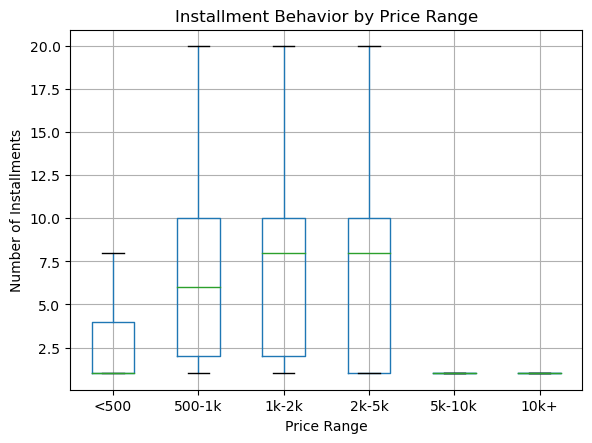

In [52]:
order_payments['price_range'] = pd.cut(
    order_payments['payment_value'],
    bins=[0, 500, 1000, 2000, 5000, 10000, 20000],
    labels=['<500', '500-1k', '1k-2k', '2k-5k', '5k-10k', '10k+']
)

plt.figure(figsize=(10,6))
order_payments.boxplot(column='payment_installments', by='price_range', showfliers=False)
plt.title('Installment Behavior by Price Range')
plt.suptitle('')
plt.xlabel('Price Range')
plt.ylabel('Number of Installments')
plt.show()

The median number of payment installments increased with order value, which aligns with expected consumer financing behavior. However, there were a few outliers where high-value purchases were completed in a single installment. These values were retained, as they represent legitimate consumer behavior rather than data errors.

**Products Dataset Outliers**

In [53]:
prod_cols_check = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
products[prod_cols_check].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,2276.376802,30.814725,16.937422,23.196534
std,4281.926387,16.914005,13.637175,12.078707
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


The minimum and maximum product weights could correspond to jewelry and furniture, respectively. 

In [54]:
# Define Small Thresholds to check the product categories
low_threshold = products['product_weight_g'].quantile(0.01)
print(low_threshold)
low_weight_products = products[products['product_weight_g'] < low_threshold]
print(low_weight_products['product_category_name_english'].value_counts())

60.0
product_category_name_english
telephony                                  59
auto                                       51
fashion_bags_accessories                   39
health_beauty                              28
computers_accessories                      22
perfumery                                  17
sports_leisure                             12
furniture_decor                            10
home_appliances                            10
baby                                        9
stationery                                  8
cool_stuff                                  7
housewares                                  7
garden_tools                                6
toys                                        6
bed_bath_table                              6
construction_tools_construction             3
pet_shop                                    3
watches_gifts                               2
consoles_games                              2
unknown_category                            2

In [55]:
high_threshold = products['product_weight_g'].quantile(0.99)
print(high_threshold)

22537.5


In [56]:
high_weight_products = products[products['product_weight_g'] > high_threshold]
print(high_weight_products['product_category_name_english'].value_counts())

product_category_name_english
sports_leisure                             39
furniture_decor                            38
health_beauty                              35
housewares                                 27
office_furniture                           22
auto                                       21
baby                                       17
furniture_living_room                      16
bed_bath_table                             14
kitchen_dining_laundry_garden_furniture    13
garden_tools                               10
cool_stuff                                  9
pet_shop                                    9
unknown_category                            7
home_appliances_2                           6
construction_tools_construction             5
signaling_and_security                      5
luggage_accessories                         4
industry_commerce_and_business              4
furniture_mattress_and_upholstery           3
home_construction                           3
toys

In [57]:
comparison = pd.DataFrame({
    'Group': ['Light (1%)', 'Heavy (99%)'],
    'Mean_Length_cm': [low_weight_products['product_length_cm'].mean(), high_weight_products['product_length_cm'].mean()],
    'Mean_Height_cm': [low_weight_products['product_height_cm'].mean(), high_weight_products['product_height_cm'].mean()],
    'Mean_Width_cm': [low_weight_products['product_width_cm'].mean(), high_weight_products['product_width_cm'].mean()],
    'Median_Length_cm': [low_weight_products['product_length_cm'].median(), high_weight_products['product_length_cm'].median()],
    'Median_Height_cm': [low_weight_products['product_height_cm'].median(), high_weight_products['product_height_cm'].median()],
    'Median_Width_cm': [low_weight_products['product_width_cm'].median(), high_weight_products['product_width_cm'].median()],
})
comparison.head()

,Group,Mean_Length_cm,Mean_Height_cm,Mean_Width_cm,Median_Length_cm,Median_Height_cm,Median_Width_cm
0,Light (1%),21.177370,9.721713,16.220183,18.0,6.0,13.0
1,Heavy (99%),61.036364,54.221212,48.272727,60.0,55.0,50.0


To assess data quality, I compared the physical dimensions (length, height, and width) of products in the lowest and highest 1% of product weights.

Products in the bottom 1% of weights were generally smaller in size. Products in the top 1% of weights were significantly larger.

This consistent relationship between size and weight suggests that both the product weight and dimension fields are valid. There were no major mismatches between product weight and dimensions, such as a heavy item with small dimensions. As a result, all values were retained, as they likely represent realistic variation in product size and packaging.

#### 3.2.5 Data Types Update

In [58]:
id_columns = ['order_id', 'customer_id', 'seller_id', 'product_id', 'customer_unique_id', 'product_category_name', 'order_item_id', 'order_status', 'freight_status', 'delivery_status']
for col in id_columns:
    for df in [orders, customers, sellers, products, order_items]:
        if col in df.columns:
            df[col] = df[col].astype('string')
    #print(df.info())

In [59]:
# convert date columns to datetime dtype
from pandas.api.types import is_object_dtype

for name, df in all_dfs_dict.items():
    for col in df.columns:
        if is_object_dtype(df[col]) and ('date' in col or 'timestamp' in col):
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"Converted {name}.{col} to datetime")
            except Exception as e:
                print(f"Skipped {name}.{col} due to error: {e}")

Converted orders.order_purchase_timestamp to datetime
Converted orders.order_delivered_carrier_date to datetime
Converted orders.order_delivered_customer_date to datetime
Converted orders.order_estimated_delivery_date to datetime
Converted order_items.shipping_limit_date to datetime
Converted order_reviews.review_creation_date to datetime
Converted order_reviews.review_answer_timestamp to datetime


#### 3.2.5 Duplicate Check

In [60]:
# Check for duplicates in each dataset
for name, df in all_dfs_dict.items():
    dup_count = df.duplicated().sum()
    print(f"{name}: {dup_count} duplicate rows")
    if dup_count > 0:
        display(df[df.duplicated()])

sellers: 0 duplicate rows
orders: 0 duplicate rows
order_items: 0 duplicate rows
customers: 0 duplicate rows
geolocation: 261831 duplicate rows


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


order_payments: 0 duplicate rows
order_reviews: 0 duplicate rows
products: 0 duplicate rows


In [61]:
geolocation_avg = (
    geolocation
    .groupby('geolocation_zip_code_prefix', as_index=False)
    .agg({
        'geolocation_lat': 'mean',
        'geolocation_lng': 'mean'
    })
)

# rename columns
geolocation_avg.rename(columns={
    'geolocation_lat': 'avg_lat',
    'geolocation_lng': 'avg_lng'
}, inplace=True)
# Keep only one coordinate per zip prefix
geolocation = geolocation.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

# verify that each prefix is now unique
print(f"Unique ZIP prefixes: {geolocation['geolocation_zip_code_prefix'].nunique()}")
print(f"Total rows after cleanup: {len(geolocation)}")

Unique ZIP prefixes: 19015
Total rows after cleanup: 19015


In [62]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 999846
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


### 3.3 Merge Datasets

Merge orders with customers

In [63]:
orders_customers = orders.merge(customers, on='customer_id', how='left')

Merge order_order items to get product and seller info

In [64]:
order_details = orders_customers.merge(order_items, on='order_id', how='left')

Add product information

In [65]:
order_details = order_details.merge(products, on='product_id', how='left')

Add payment and order review details

In [66]:
order_details = order_details.merge(order_payments, on='order_id', how='left')
order_details = order_details.merge(order_reviews, on='order_id', how='left')

Add seller and geographic location information

In [67]:
order_details = order_details.merge(sellers, on='seller_id', how='left')
order_details = order_details.merge(geolocation_avg, 
                                    left_on='customer_zip_code_prefix', 
                                    right_on='geolocation_zip_code_prefix', 
                                    how='left')

In [68]:
order_details.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_year,order_purchase_timestamp_month,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,avg_lat,avg_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350.0,maua,SP,3149.0,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350.0,maua,SP,3149.0,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350.0,maua,SP,3149.0,-23.576983,-46.587161
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,31570.0,belo horizonte,SP,47813.0,-12.177924,-44.660711
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,NaN,NaN,2018-08-18,2018-08-22 19:07:58,14840.0,guariba,SP,75265.0,-16.745150,-48.514783


In [69]:
# Export merged dataset to CSV
order_details.to_parquet('order_details.parquet', index=False)

print("File saved successfully as 'order_details.parquet'")

File saved successfully as 'order_details.parquet'
